# 库导入

In [1]:
import numpy as np
import pandas as pd


# 数据导入

In [2]:
sheet = pd.read_csv('data.csv')
data = sheet.iloc[:, :].values

sheet.head()

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112,W,NCTL,0


In [3]:
print(data)

[['2023-wimbledon-1301' 'Carlos Alcaraz' 'Nicolas Jarry' ... 'BC' 'NCTL'
  'ND']
 ['2023-wimbledon-1301' 'Carlos Alcaraz' 'Nicolas Jarry' ... 'B' 'CTL'
  'ND']
 ['2023-wimbledon-1301' 'Carlos Alcaraz' 'Nicolas Jarry' ... 'B' 'NCTL'
  'D']
 ...
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'W' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'C' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']]


In [4]:
final_match = []

for i in data:
    if i[0] == '2023-wimbledon-1701':
        final_match.append(i)

final_match = np.array(final_match)
print(final_match)

[['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'W' 'CTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']
 ...
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'W' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'C' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']]


In [5]:
# 打印出所有的列名
category = dict()
for i in range(len(sheet.columns)):
    category[sheet.columns[i]] = i
print(category)

{'match_id': 0, 'player1': 1, 'player2': 2, 'elapsed_time': 3, 'set_no': 4, 'game_no': 5, 'point_no': 6, 'p1_sets': 7, 'p2_sets': 8, 'p1_games': 9, 'p2_games': 10, 'p1_score': 11, 'p2_score': 12, 'server': 13, 'serve_no': 14, 'point_victor': 15, 'p1_points_won': 16, 'p2_points_won': 17, 'game_victor': 18, 'set_victor': 19, 'p1_ace': 20, 'p2_ace': 21, 'p1_winner': 22, 'p2_winner': 23, 'winner_shot_type': 24, 'p1_double_fault': 25, 'p2_double_fault': 26, 'p1_unf_err': 27, 'p2_unf_err': 28, 'p1_net_pt': 29, 'p2_net_pt': 30, 'p1_net_pt_won': 31, 'p2_net_pt_won': 32, 'p1_break_pt': 33, 'p2_break_pt': 34, 'p1_break_pt_won': 35, 'p2_break_pt_won': 36, 'p1_break_pt_missed': 37, 'p2_break_pt_missed': 38, 'p1_distance_run': 39, 'p2_distance_run': 40, 'rally_count': 41, 'speed_mph': 42, 'serve_width': 43, 'serve_depth': 44, 'return_depth': 45}


## 双误失分
double_fault_1 : { n : m }     代表 Carlos Alcaraz 截止第n个point，双误失分m次

double_fault_2 : { n : m }     代表 Novak Djokovic 截止第n个point，双误失分m次

In [6]:
print(len(final_match))
double_fault_1, double_fault_2 = dict(), dict()
unf_err_1,unf_err_2 = dict(),dict()
get_ace_1,get_ace_2 = dict(),dict()
return_duce_1,return_duce_2 = dict(),dict()
get_ad_1,get_ad_2 = dict(),dict()
run_distance_1,run_distance_2 = dict(),dict()
hit_num_1,hit_num_2 = dict(),dict()
on_net_1,on_net_2 = dict(),dict()
on_net_success_1,on_net_success_2 = dict(),dict()
game_score_1,game_score_2 = dict(),dict()
set_score_1,set_score_2 = dict(),dict()

334


In [7]:
for i in range(len(final_match)):
    if i==0:
        double_fault_1[i+1] = 0
        double_fault_2[i+1] = 0
    else:
        double_fault_1[i+1] = double_fault_1[i] + final_match[i][category['p1_double_fault']]
        double_fault_2[i+1] = double_fault_2[i] + final_match[i][category['p2_double_fault']]


print(double_fault_1)   
print(double_fault_2)
    

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 2, 121: 2, 122: 2, 123: 2, 124: 2, 125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 130: 2, 131: 2, 132: 2, 133: 2, 134: 2, 135: 2, 136: 2, 137: 2, 138: 2, 139

## 受迫失误


In [8]:
for i in range(len(final_match)):
    if i==0:
        unf_err_1[i+1] = 0
        unf_err_2[i+1] = 0
    else:
        unf_err_1[i+1] = unf_err_1[i] + final_match[i][category['p1_unf_err']]
        unf_err_2[i+1] = unf_err_2[i] + final_match[i][category['p2_unf_err']]

print(unf_err_1)
print(unf_err_2)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 1, 11: 2, 12: 2, 13: 3, 14: 3, 15: 3, 16: 3, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 6, 33: 6, 34: 7, 35: 7, 36: 7, 37: 7, 38: 8, 39: 9, 40: 9, 41: 9, 42: 9, 43: 9, 44: 9, 45: 9, 46: 9, 47: 9, 48: 9, 49: 9, 50: 9, 51: 9, 52: 9, 53: 9, 54: 9, 55: 10, 56: 10, 57: 10, 58: 10, 59: 10, 60: 10, 61: 11, 62: 11, 63: 11, 64: 11, 65: 11, 66: 12, 67: 12, 68: 13, 69: 13, 70: 13, 71: 14, 72: 14, 73: 14, 74: 15, 75: 15, 76: 15, 77: 16, 78: 16, 79: 16, 80: 16, 81: 16, 82: 16, 83: 16, 84: 16, 85: 16, 86: 16, 87: 16, 88: 16, 89: 16, 90: 16, 91: 16, 92: 16, 93: 16, 94: 16, 95: 16, 96: 16, 97: 16, 98: 16, 99: 16, 100: 16, 101: 17, 102: 18, 103: 18, 104: 18, 105: 18, 106: 18, 107: 18, 108: 19, 109: 19, 110: 19, 111: 20, 112: 20, 113: 21, 114: 21, 115: 22, 116: 22, 117: 22, 118: 22, 119: 22, 120: 22, 121: 22, 122: 22, 123: 22, 124: 22, 125: 22, 126: 23, 127: 23, 128: 23, 129: 23, 

# ACE得分

In [9]:
for i in range(len(final_match)):
    if i==0:
        get_ace_1[i+1] = 0
        get_ace_2[i+1] = 0
    else:
        get_ace_1[i+1] = get_ace_1[i] + final_match[i][category['p1_ace']]
        get_ace_2[i+1] = get_ace_2[i] + final_match[i][category['p2_ace']]

print(get_ace_1)
print(get_ace_2)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 2, 121: 2, 122: 2, 123: 2, 124: 2, 125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 130: 3, 131: 3, 132: 3, 133: 3, 134: 3, 135: 3, 136: 3, 137: 3, 138: 3, 139

## 回到deuce


In [10]:
for i in range(len(final_match)):
    if i==0:
        return_duce_1[i+1] = 0
        return_duce_2[i+1] = 0
    else:
        if final_match[i][category['p1_score']] < final_match[i][category['p2_score']] or final_match[i][category['p2_score']]=='AD' and final_match[i+1][category['p1_score']] == final_match[i][category['p2_score']]:
            duce1 = 0
        else:
            duce1 = 1
        

        if final_match[i][category['p2_score']] < final_match[i][category['p1_score']] or final_match[i][category['p1_score']]=='AD' and final_match[i+1][category['p2_score']] == final_match[i][category['p1_score']]:
            duce2 = 0
        else:   
            duce2 = 1
        return_duce_1[i+1] = return_duce_1[i] + duce1
        return_duce_2[i+1] = return_duce_2[i] + duce2



print(return_duce_1)
print(return_duce_2)

{1: 0, 2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 5, 9: 6, 10: 6, 11: 7, 12: 7, 13: 7, 14: 7, 15: 7, 16: 7, 17: 8, 18: 8, 19: 9, 20: 10, 21: 11, 22: 11, 23: 12, 24: 12, 25: 13, 26: 13, 27: 13, 28: 13, 29: 14, 30: 14, 31: 15, 32: 15, 33: 15, 34: 15, 35: 15, 36: 16, 37: 17, 38: 18, 39: 19, 40: 20, 41: 21, 42: 22, 43: 22, 44: 22, 45: 22, 46: 23, 47: 24, 48: 25, 49: 26, 50: 27, 51: 28, 52: 29, 53: 30, 54: 31, 55: 32, 56: 32, 57: 33, 58: 34, 59: 35, 60: 36, 61: 37, 62: 37, 63: 38, 64: 39, 65: 40, 66: 41, 67: 42, 68: 42, 69: 43, 70: 44, 71: 45, 72: 46, 73: 47, 74: 48, 75: 49, 76: 49, 77: 50, 78: 50, 79: 51, 80: 52, 81: 53, 82: 54, 83: 55, 84: 56, 85: 57, 86: 58, 87: 59, 88: 60, 89: 61, 90: 62, 91: 63, 92: 63, 93: 64, 94: 65, 95: 66, 96: 67, 97: 68, 98: 68, 99: 69, 100: 69, 101: 69, 102: 70, 103: 70, 104: 71, 105: 72, 106: 73, 107: 74, 108: 75, 109: 76, 110: 76, 111: 77, 112: 77, 113: 78, 114: 78, 115: 79, 116: 79, 117: 80, 118: 81, 119: 82, 120: 83, 121: 83, 122: 84, 123: 84, 124: 85, 125: 85, 1

## 获得AD

In [11]:
for i in range(len(final_match)):
    if i==0:
        get_ad_1[i+1] = 0
        get_ad_2[i+1] = 0
    else:
        if final_match[i][category['p1_score']] == 'AD' and final_match[i+1][category['p1_score']] != 'AD':
            ad1 = 1
        else:
            ad1 = 0
        if final_match[i][category['p2_score']] == 'AD' and final_match[i+1][category['p2_score']] != 'AD':
            ad2 = 1
        else:
            ad2 = 0
        get_ad_1[i+1] = get_ad_1[i] + ad1
        get_ad_2[i+1] = get_ad_2[i] + ad2
print(get_ad_1)
print(get_ad_2)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 1, 59: 1, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 3, 85: 3, 86: 4, 87: 4, 88: 4, 89: 4, 90: 4, 91: 4, 92: 4, 93: 4, 94: 4, 95: 4, 96: 4, 97: 4, 98: 4, 99: 4, 100: 4, 101: 4, 102: 4, 103: 4, 104: 4, 105: 4, 106: 4, 107: 4, 108: 4, 109: 4, 110: 4, 111: 4, 112: 4, 113: 4, 114: 4, 115: 4, 116: 4, 117: 4, 118: 4, 119: 4, 120: 4, 121: 4, 122: 4, 123: 4, 124: 4, 125: 4, 126: 4, 127: 4, 128: 4, 129: 4, 130: 4, 131: 4, 132: 4, 133: 4, 134: 4, 135: 4, 136: 4, 137: 4, 138: 4, 139

## 体能消耗

In [12]:
for i in range(len(final_match)):
    if i==0:
        run_distance_1[i+1] = 0
        run_distance_2[i+1] = 0
    else:
        run_distance_1[i+1] = run_distance_1[i] + final_match[i][category['p1_distance_run']]
        run_distance_2[i+1] = run_distance_2[i] + final_match[i][category['p2_distance_run']]
print(run_distance_1)
print(run_distance_2)

{1: 0, 2: 18.502, 3: 23.287999999999997, 4: 28.194999999999997, 5: 41.07599999999999, 6: 48.36899999999999, 7: 71.65199999999999, 8: 94.83099999999999, 9: 123.94599999999998, 10: 132.88699999999997, 11: 138.42699999999996, 12: 155.24599999999995, 13: 176.72799999999995, 14: 186.60399999999996, 15: 194.24199999999996, 16: 216.12199999999996, 17: 236.19999999999996, 18: 266.00499999999994, 19: 297.98599999999993, 20: 391.3499999999999, 21: 439.5909999999999, 22: 440.2599999999999, 23: 452.5379999999999, 24: 455.3209999999999, 25: 486.1859999999999, 26: 513.93, 27: 526.2969999999999, 28: 531.9799999999999, 29: 567.4359999999999, 30: 578.5029999999999, 31: 584.376, 32: 597.405, 33: 611.3009999999999, 34: 637.867, 35: 652.164, 36: 661.3199999999999, 37: 670.7729999999999, 38: 677.5799999999999, 39: 678.656, 40: 712.1479999999999, 41: 728.3409999999999, 42: 760.2979999999999, 43: 768.7889999999999, 44: 773.1929999999999, 45: 786.6909999999999, 46: 811.6419999999999, 47: 846.5649999999999, 48

## 击球次数

In [13]:
for i in range(len(final_match)):
    if i==0:
        hit_num_1[i+1] = 0
        hit_num_2[i+1] = 0
    else:
        hit_num_1[i+1] = hit_num_1[i] + final_match[i][category['rally_count']]
        hit_num_2[i+1] = hit_num_2[i] + final_match[i][category['rally_count']]

## 上网次数

In [14]:
for i in range(len(final_match)):
    if i==0:
        on_net_1[i+1] = 0
        on_net_2[i+1] = 0
    else:
        on_net_1[i+1] = on_net_1[i] + final_match[i][category['p1_net_pt']]
        on_net_2[i+1] = on_net_2[i] + final_match[i][category['p2_net_pt']]

## 上网成功次数

In [15]:
for i in range(len(final_match)):
    if i==0:
        on_net_success_1[i+1] = 0
        on_net_success_2[i+1] = 0
    else:
        on_net_success_1[i+1] = on_net_success_1[i] + final_match[i][category['p1_net_pt_won']]
        on_net_success_2[i+1] = on_net_success_2[i] + final_match[i][category['p2_net_pt_won']]
print(on_net_success_1)


{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 1, 37: 1, 38: 1, 39: 1, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 3, 47: 3, 48: 4, 49: 5, 50: 5, 51: 5, 52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 6, 63: 6, 64: 6, 65: 6, 66: 6, 67: 6, 68: 6, 69: 6, 70: 6, 71: 6, 72: 6, 73: 6, 74: 6, 75: 6, 76: 6, 77: 6, 78: 6, 79: 6, 80: 7, 81: 7, 82: 7, 83: 8, 84: 8, 85: 8, 86: 8, 87: 8, 88: 8, 89: 8, 90: 8, 91: 8, 92: 8, 93: 9, 94: 9, 95: 9, 96: 9, 97: 9, 98: 9, 99: 9, 100: 9, 101: 9, 102: 9, 103: 9, 104: 9, 105: 9, 106: 9, 107: 9, 108: 9, 109: 9, 110: 9, 111: 9, 112: 9, 113: 9, 114: 9, 115: 9, 116: 9, 117: 9, 118: 9, 119: 9, 120: 9, 121: 9, 122: 9, 123: 9, 124: 9, 125: 9, 126: 9, 127: 9, 128: 9, 129: 9, 130: 9, 131: 9, 132: 9, 133: 9, 134: 9, 135: 9, 136: 9, 137: 9, 138: 9, 139

# FZJ

In [16]:
one_serve_win_1,            one_serve_win_2           = dict(), dict()
one_serve_back_1,           one_serve_back_2          = dict(), dict()
one_serve_success_1,        one_serve_success_2       = dict(), dict()
two_serve_win_1,            two_serve_win_2           = dict(), dict()
two_serve_back_1,           two_serve_back_2          = dict(), dict()
break_pt_1,                 break_pt_2                = dict(), dict()
break_pt_won_1,             break_pt_won_2            = dict(), dict()
continuous_win_1,           continuous_win_2          = dict(), dict()
avg_mph_1,                  avg_mph_2                 = dict(), dict()
max_mph_1,                  max_mph_2                 = dict(), dict()
       
one_serve_win_rate_1,       one_serve_win_rate_2      = dict(), dict()
one_serve_success_rate_1,   one_serve_success_rate_2  = dict(), dict()
two_serve_win_rate_1,       two_serve_win_rate_2      = dict(), dict()

In [17]:
last_won = 0
total_mph_1 = 0
total_mph_2 = 0
serve_times_1 = 0
serve_times_2 = 0


for i in range(len(final_match)):
    total_mph_1 += (final_match[i][category['speed_mph']] if final_match[i][category['server']] == 1 else 0)
    print(total_mph_1, final_match[i][category['speed_mph']])
    total_mph_2 += (final_match[i][category['speed_mph']] if final_match[i][category['server']] == 2 else 0)
    serve_times_1 += (final_match[i][category['server']] == 1)
    serve_times_2 += (final_match[i][category['server']] == 2)
    
    one_serve_win_1[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_win_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 1)
    one_serve_back_1[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_back_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 1)
    one_serve_success_1[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_success_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 1)
    two_serve_win_1[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_win_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 1)
    two_serve_back_1[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_back_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 1 and final_match[i][category['p2_double_fault']] == 0)
    break_pt_1[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p1_break_pt']] == 1)
    break_pt_won_1[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_won_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p1_break_pt_won']] == 1)
    continuous_win_1[final_match[i][category['point_no']]] = (0 if i == 0 else continuous_win_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['point_victor']] == 1 and last_won == 1)
    
    avg_mph_1[final_match[i][category['point_no']]] = (0 if serve_times_1 == 0 else total_mph_1 / serve_times_1)
    max_mph_1[final_match[i][category['point_no']]] = (0 if i == 0 else max_mph_1[final_match[i - 1][category['point_no']]])
    max_mph_1[final_match[i][category['point_no']]] = (max(max_mph_1[final_match[i][category['point_no']]], final_match[i][category['speed_mph']]) if final_match[i][category['server']] == 1 else max_mph_1[final_match[i][category['point_no']]])
    
    one_serve_win_2[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_win_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 2)
    one_serve_back_2[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_back_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 2)
    one_serve_success_2[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_success_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 2)
    two_serve_win_2[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_win_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 2)
    two_serve_back_2[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_back_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 2 and final_match[i][category['p1_double_fault']] == 0)
    break_pt_2[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p2_break_pt']] == 1)
    break_pt_won_2[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_won_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p2_break_pt_won']] == 1)
    continuous_win_2[final_match[i][category['point_no']]] = (0 if i == 0 else continuous_win_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['point_victor']] == 2 and last_won == 2)
    
    avg_mph_2[final_match[i][category['point_no']]] = (0 if serve_times_2 == 0 else total_mph_2 / serve_times_2)
    max_mph_2[final_match[i][category['point_no']]] = (0 if i == 0 else max_mph_2[final_match[i - 1][category['point_no']]])
    max_mph_2[final_match[i][category['point_no']]] = (max(max_mph_2[final_match[i][category['point_no']]], final_match[i][category['speed_mph']]) if final_match[i][category['server']] == 2 else max_mph_2[final_match[i][category['point_no']]])
    
    one_serve_win_rate_1[final_match[i][category['point_no']]] = (0 if serve_times_1 == 0 else one_serve_win_1[final_match[i][category['point_no']]] / serve_times_1)
    one_serve_success_rate_1[final_match[i][category['point_no']]] = (0 if serve_times_1 == 0 else one_serve_success_1[final_match[i][category['point_no']]] / serve_times_1)
    two_serve_win_rate_1[final_match[i][category['point_no']]] = (0 if serve_times_1 == 0 else two_serve_win_1[final_match[i][category['point_no']]] / serve_times_1)
    
    one_serve_win_rate_2[final_match[i][category['point_no']]] = (0 if serve_times_2 == 0 else one_serve_win_2[final_match[i][category['point_no']]] / serve_times_2)
    one_serve_success_rate_2[final_match[i][category['point_no']]] = (0 if serve_times_2 == 0 else one_serve_success_2[final_match[i][category['point_no']]] / serve_times_2)
    two_serve_win_rate_2[final_match[i][category['point_no']]] = (0 if serve_times_2 == 0 else two_serve_win_2[final_match[i][category['point_no']]] / serve_times_2)
    
    last_won = final_match[i][category['point_victor']]
    

0 111
0 126
0 102
0 120
0 108
0 127
0 111
0 124
0 127
0 125
123 123
242 119
349 107
470 121
598 128
699 101
699 122
699 107
699 85
699 88
699 121
699 121
807 108
935 128
1063 128
1180 117
1290 110
1418 128
1516 98
1611 95
1611 108
1611 126
1611 111
1611 125
1611 121
1740 129
1871 131
1974 103
1974 0
2104 130
2222 118
2222 117
2222 110
2222 120
2222 125
2336 114
2465 129
2591 126
2708 117
2834 126
2834 0
2834 94
2834 111
2834 107
2834 94
2834 86
2834 104
2834 118
2834 113
2834 116
2834 0
2927 93
3052 125
3172 120
3284 112
3406 122
3521 115
3613 92
3613 109
3613 109
3613 92
3613 121
3613 99
3613 118
3613 110
3613 122
3718 105
3844 126
3957 113
4083 126
4215 132
4343 128
4459 116
4582 123
4706 124
4821 115
4821 122
4821 95
4821 101
4821 115
4821 84
4821 124
4930 109
5059 129
5159 100
5278 119
5278 104
5278 115
5278 91
5278 88
5278 91
5402 124
5510 108
5626 116
5740 114
5849 109
5849 125
5849 119
5849 109
5849 115
5849 113
5849 123
5849 115
5849 85
5955 106
6056 101
6166 110
6298 132
6424 

In [18]:
print(avg_mph_1)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 123.0, 12: 121.0, 13: 116.33333333333333, 14: 117.5, 15: 119.6, 16: 116.5, 17: 116.5, 18: 116.5, 19: 116.5, 20: 116.5, 21: 116.5, 22: 116.5, 23: 115.28571428571429, 24: 116.875, 25: 118.11111111111111, 26: 118.0, 27: 117.27272727272727, 28: 118.16666666666667, 29: 116.61538461538461, 30: 115.07142857142857, 31: 115.07142857142857, 32: 115.07142857142857, 33: 115.07142857142857, 34: 115.07142857142857, 35: 115.07142857142857, 36: 116.0, 37: 116.9375, 38: 116.11764705882354, 39: 109.66666666666667, 40: 110.73684210526316, 41: 111.1, 42: 111.1, 43: 111.1, 44: 111.1, 45: 111.1, 46: 111.23809523809524, 47: 112.04545454545455, 48: 112.65217391304348, 49: 112.83333333333333, 50: 113.36, 51: 113.36, 52: 113.36, 53: 113.36, 54: 113.36, 55: 113.36, 56: 113.36, 57: 113.36, 58: 113.36, 59: 113.36, 60: 113.36, 61: 109.0, 62: 108.4074074074074, 63: 109.0, 64: 109.37931034482759, 65: 109.46666666666667, 66: 109.87096774193549, 67: 110.

# 合并数据，用于训练

In [19]:

one_serve_win_1 = np.array(list(one_serve_win_1.values()))
one_serve_win_2 = np.array(list(one_serve_win_2.values()))
one_serve_back_1 = np.array(list(one_serve_back_1.values()))
one_serve_back_2 = np.array(list(one_serve_back_2.values()))
one_serve_success_1 = np.array(list(one_serve_success_1.values()))
one_serve_success_2 = np.array(list(one_serve_success_2.values()))
two_serve_win_1 = np.array(list(two_serve_win_1.values()))
two_serve_win_2 = np.array(list(two_serve_win_2.values()))
two_serve_back_1 = np.array(list(two_serve_back_1.values()))
two_serve_back_2 = np.array(list(two_serve_back_2.values()))
break_pt_1 = np.array(list(break_pt_1.values()))
break_pt_2 = np.array(list(break_pt_2.values()))
break_pt_won_1 = np.array(list(break_pt_won_1.values()))
break_pt_won_2 = np.array(list(break_pt_won_2.values()))
continuous_win_1 = np.array(list(continuous_win_1.values()))
continuous_win_2 = np.array(list(continuous_win_2.values()))
avg_mph_1 = np.array(list(avg_mph_1.values()))
avg_mph_2 = np.array(list(avg_mph_2.values()))
max_mph_1 = np.array(list(max_mph_1.values()))
max_mph_2 = np.array(list(max_mph_2.values()))

double_fault_1 = np.array(list(double_fault_1.values()))
double_fault_2 = np.array(list(double_fault_2.values()))
unf_err_1 = np.array(list(unf_err_1.values()))
unf_err_2 = np.array(list(unf_err_2.values()))
get_ace_1 = np.array(list(get_ace_1.values()))
get_ace_2 = np.array(list(get_ace_2.values()))
return_duce_1 = np.array(list(return_duce_1.values()))
return_duce_2 = np.array(list(return_duce_2.values()))
get_ad_1 = np.array(list(get_ad_1.values()))
get_ad_2 = np.array(list(get_ad_2.values()))
run_distance_1 = np.array(list(run_distance_1.values()))
run_distance_2 = np.array(list(run_distance_2.values()))
hit_num_1 = np.array(list(hit_num_1.values()))
hit_num_2 = np.array(list(hit_num_2.values()))
on_net_1 = np.array(list(on_net_1.values()))
on_net_2 = np.array(list(on_net_2.values()))
on_net_success_1 = np.array(list(on_net_success_1.values()))
on_net_success_2 = np.array(list(on_net_success_2.values()))

one_serve_win_rate_1 = np.array(list(one_serve_win_rate_1.values()))
one_serve_success_rate_1 = np.array(list(one_serve_success_rate_1.values()))
two_serve_win_rate_1 = np.array(list(two_serve_win_rate_1.values()))

one_serve_win_rate_2 = np.array(list(one_serve_win_rate_2.values()))
one_serve_success_rate_2 = np.array(list(one_serve_success_rate_2.values()))
two_serve_win_rate_2 = np.array(list(two_serve_win_rate_2.values()))

print(len(one_serve_win_1))
print(len(double_fault_1))

334
334


In [20]:
game_score_1 = final_match[:, category['p1_sets']]
print(game_score_1.shape)
print(game_score_1)
game_score_2 = final_match[:, category['p2_sets']]
print(game_score_2.shape)
print(game_score_2)

(334,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
(334,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

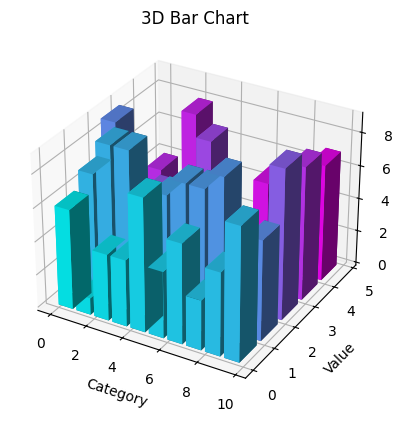

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(0)
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
values = np.random.randint(1, 10, size=(10, 5))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid(np.arange(10), np.arange(5))
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = np.zeros(len(x_data))

dx = dy = 0.8
dz = values.flatten()
colors = sns.color_palette('cool', len(z_data))
ax.bar3d(x_data, y_data, z_data, dx, dy, dz, color=colors, shade=True)

ax.set_title('3D Bar Chart')
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_zlabel('Height')
plt.show()

In [22]:
values = np.array([list(game_score_1).reverse(), list(break_pt_won_1).reverse(), list(break_pt_1).reverse()])
# values = np.array([break_pt_1, break_pt_won_1, game_score_1])
print(type(values))
print(values)

<class 'numpy.ndarray'>
[None None None]


In [23]:
print(game_score_1)
print(list(game_score_1)[::-1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

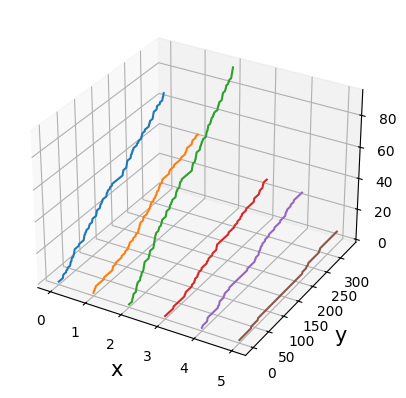

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(0)
categories = ['break_pt', 'break_pt_won', 'game_score']
# categories = ['one_serve_win', 'one_serve_back', 'one_ser', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# size = (334, 3)
# values = np.array([break_pt_1, break_pt_won_1, game_score_1]).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# print(x_data)

x1 = [0 for i in range(334)]
y1 = np.arange(334)
z1 = one_serve_win_1

x2 = [1 for i in range(334)]
y2 = np.arange(334)
z2 = one_serve_back_1

x3 = [2 for i in range(334)]
y3 = np.arange(334)
z3 = one_serve_success_1

x4 = [3 for i in range(334)]
y4 = np.arange(334)
z4 = two_serve_win_1

x5 = [4 for i in range(334)]
y5 = np.arange(334)
z5 = two_serve_back_1

x6 = [5 for i in range(334)]
y6 = np.arange(334)
z6 = double_fault_1
# 绘制三维曲线
# ax = fig.add_subplot(221,projection='3d')
# theta = np.linspace(-4*np.pi, 4*np.pi, 500)
# z = np.linspace(-2,2,500)
# r = z**2 + 1
# x = r*np.sin(theta)
# y = r*np.conj(theta)



# dx = dy = 0.8
# # dx = (0.1, 0.9)
dz = values.flatten()
colors = sns.color_palette('cool', len(z_data))
# colors = sns.color_palette('red')
# ax.bar3d(x_data, y_data, z_data, dx, dy, dz, color=colors, shade=True)

# ax.set_xticks([0.4, 1.4, 2.4])
# ax.set_xticklabels(categories)
# ax.set_zticks([i for i in range(0, 21, 5)])

# ax.set_title('3D Bar Chart')
# ax.set_xlabel('Category')
# ax.set_ylabel('point')
# ax.set_zlabel('Height')

ax.plot(x1, y1, z1)
ax.plot(x2, y2, z2)
ax.plot(x3, y3, z3)
ax.plot(x4, y4, z4)
ax.plot(x5, y5, z5)
ax.plot(x6, y6, z6)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.show()

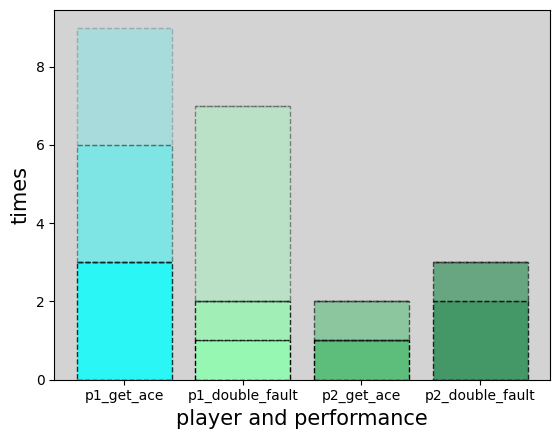

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(0)
categories = ['one_serve_win', 'one_serve_back', 'one_serve_success', 'two_serve_win', 'two_serve_back', 'double_fault']
# categories = ['one_serve_win', 'one_serve_back', 'one_ser', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# size = (334, 3)
# values = np.array([break_pt_1, break_pt_won_1, game_score_1]).T

fig = plt.figure()
ax = fig.add_subplot()

game = [0, 44, 138, 208, 272, 333]

y1 = get_ace_1
y2 = double_fault_1
y3 = get_ace_2
y4 = double_fault_2

ax.bar(1,bottom = 0, height = y1[game[1]], ls="--", align = "center", ec="black", fc="#00FFFF", alpha = 1)
ax.bar(1,bottom = y1[game[1]], height = y1[game[2]] - y1[game[1]], ls="--", align = "center", ec="black", fc="#00FFFF", alpha = 0.8)
ax.bar(1,bottom = y1[game[2]], height = y1[game[3]] - y1[game[2]], ls="--", align = "center", ec="black", fc="#00FFFF", alpha = 0.6)
ax.bar(1,bottom = y1[game[3]], height = y1[game[4]] - y1[game[3]], ls="--", align = "center", ec="black", fc="#00FFFF", alpha = 0.4)
ax.bar(1,bottom = y1[game[4]], height = y1[game[5]] - y1[game[4]], ls="--", align = "center", ec="black", fc="#00FFFF", alpha = 0.2)

ax.bar(2,bottom = 0, height = y2[game[1]], ls="--", align = "center", ec="black", fc="#95F7B1", alpha = 1)
ax.bar(2,bottom = y2[game[1]], height = y2[game[2]] - y2[game[1]], ls="--", align = "center", ec="black", fc="#95F7B1", alpha = 0.8)
ax.bar(2,bottom = y2[game[2]], height = y2[game[3]] - y2[game[2]], ls="--", align = "center", ec="black", fc="#95F7B1", alpha = 0.6)
ax.bar(2,bottom = y2[game[3]], height = y2[game[4]] - y2[game[3]], ls="--", align = "center", ec="black", fc="#95F7B1", alpha = 0.4)
ax.bar(2,bottom = y2[game[4]], height = y2[game[5]] - y2[game[4]], ls="--", align = "center", ec="black", fc="#95F7B1", alpha = 0.2)

ax.bar(3,bottom = 0, height = y3[game[1]], ls="--", align = "center", ec="black", fc="#5DBE7C", alpha = 1)
ax.bar(3,bottom = y3[game[1]], height = y3[game[2]] - y3[game[1]], ls="--", align = "center", ec="black", fc="#5DBE7C", alpha = 0.8)
ax.bar(3,bottom = y3[game[2]], height = y3[game[3]] - y3[game[2]], ls="--", align = "center", ec="black", fc="#5DBE7C", alpha = 0.6)
ax.bar(3,bottom = y3[game[3]], height = y3[game[4]] - y3[game[3]], ls="--", align = "center", ec="black", fc="#5DBE7C", alpha = 0.4)
ax.bar(3,bottom = y3[game[4]], height = y3[game[5]] - y3[game[4]], ls="--", align = "center", ec="black", fc="#5DBE7C", alpha = 0.2)

ax.bar(4,bottom = 0, height = y4[game[1]], ls="--", align = "center", ec="black", fc="#20884B", alpha = 1)
ax.bar(4,bottom = y4[game[1]], height = y4[game[2]] - y4[game[1]], ls="--", align = "center", ec="black", fc="#20884B", alpha = 0.8)
ax.bar(4,bottom = y4[game[2]], height = y4[game[3]] - y4[game[2]], ls="--", align = "center", ec="black", fc="#20884B", alpha = 0.6)
ax.bar(4,bottom = y4[game[3]], height = y4[game[4]] - y4[game[3]], ls="--", align = "center", ec="black", fc="#20884B", alpha = 0.4)
ax.bar(4,bottom = y4[game[4]], height = y4[game[5]] - y4[game[4]], ls="--", align = "center", ec="black", fc="#20884B", alpha = 0.2)

ax.set_facecolor('lightgray')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['p1_get_ace', 'p1_double_fault', 'p2_get_ace', 'p2_double_fault'])
ax.set_xlabel('player and performance', fontsize=15)
ax.set_ylabel('times', fontsize=15)
# ax.legend()
plt.show()

In [100]:
for i in range(1, 6):
    
    print('p1 ace: ', get_ace_1[game[i]], ' p1 double fault: ', double_fault_1[game[i]], ' p2 ace: ', get_ace_2[game[i]], ' p2 double fault: ', double_fault_2[game[i]])

p1 ace:  0  p1 double fault:  1  p2 ace:  1  p2 double fault:  0
p1 ace:  3  p1 double fault:  2  p2 ace:  1  p2 double fault:  2
p1 ace:  3  p1 double fault:  2  p2 ace:  2  p2 double fault:  3
p1 ace:  6  p1 double fault:  7  p2 ace:  2  p2 double fault:  3
p1 ace:  9  p1 double fault:  7  p2 ace:  2  p2 double fault:  3


In [26]:
print(y4[game[1]], y4[game[2]], y4[game[3]], y4[game[4]], y4[game[5]])
print(y1[game[1]])
print(y1[game[2]])
print(y1[game[3]])
print(y1[game[4]])
print(y1[game[5]])
print(y1)

0 2 3 3 3
0
3
3
6
9
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9
 9]


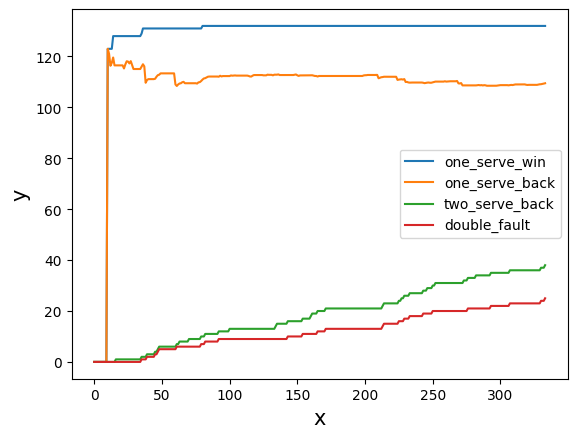

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(0)
categories = ['one_serve_win', 'one_serve_back', 'one_serve_success', 'two_serve_win', 'two_serve_back', 'double_fault']
# categories = ['one_serve_win', 'one_serve_back', 'one_ser', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# size = (334, 3)
# values = np.array([break_pt_1, break_pt_won_1, game_score_1]).T

fig = plt.figure()
ax = fig.add_subplot()

# print(x_data)

x = np.arange(334)
y1 = max_mph_1
y2 = avg_mph_1
y3 = run_distance_1 / 10
y4 = hit_num_1
y5 = on_net_1
y6 = on_net_success_1

ax.plot(x, y1, label = 'one_serve_win')
ax.plot(x, y2, label = 'one_serve_back')
# ax.plot(x, y3, label = 'one_serve_success')
# ax.plot(x, y4, label = 'two_serve_win')
ax.plot(x, y5, label = 'two_serve_back')
ax.plot(x, y6, label = 'double_fault')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.legend()
plt.show()

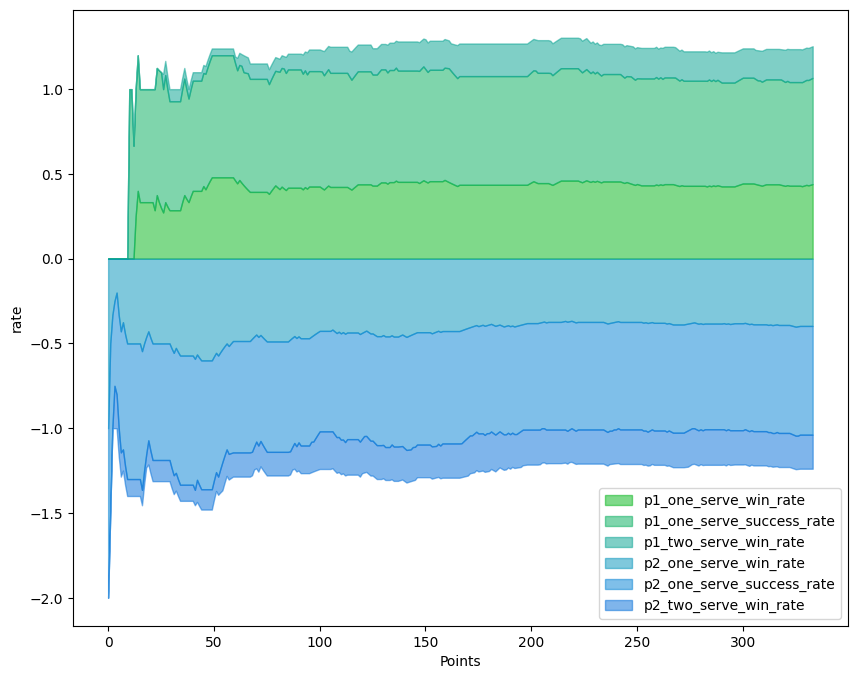

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个图表对象
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

# 绘制河流图
ax.fill_between(np.arange(334), np.zeros(334), one_serve_win_rate_1, label = 'p1_one_serve_win_rate', color='#00B417', alpha=0.5)
ax.fill_between(np.arange(334), one_serve_win_rate_1, one_serve_win_rate_1 + one_serve_success_rate_1, label = 'p1_one_serve_success_rate', color='#00AC5B', alpha=0.5)
ax.fill_between(np.arange(334), one_serve_win_rate_1 + one_serve_success_rate_1, one_serve_win_rate_1 + one_serve_success_rate_1 + two_serve_win_rate_1, label = 'p1_two_serve_win_rate', color='#00A08F', alpha=0.5)

ax.fill_between(np.arange(334), np.zeros(334), -(one_serve_win_rate_2), label = 'p2_one_serve_win_rate', color='#0092BA', alpha=0.5)
ax.fill_between(np.arange(334), -(one_serve_win_rate_2), -(one_serve_win_rate_2 + one_serve_success_rate_2), label = 'p2_one_serve_success_rate', color='#0081D4', alpha=0.5)
ax.fill_between(np.arange(334), -(one_serve_win_rate_2 + one_serve_success_rate_2), -(one_serve_win_rate_2 + one_serve_success_rate_2 + two_serve_win_rate_2), label = 'p2_two_serve_win_rate', color='#006DD8', alpha=0.5)

ax.set_facecolor('white')
# ax.set_xlim([0, len(data[0]) - 1])
# ax.set_ylim([0, max(data[3])])
# ax.set_yticks(np.arange(-2, 1.5, 0.5))
# ax.set_xticklabels([2.0, 1.5, 1.0, 0.5, 0.0, 0.5, 1.0])

# 添加图例和标签
# ax.set_title('serve rate')
ax.legend(loc='lower right')
ax.set_xlabel('Points')
ax.set_ylabel('rate')

# 显示图表
plt.show()

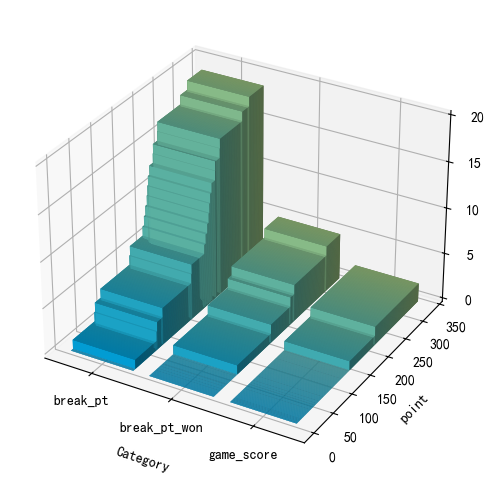

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap  

np.random.seed(0)
categories = ['break_pt', 'break_pt_won', 'game_score']
# categories = ['one_serve_win', 'one_serve_back', 'one_ser', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# size = (334, 3)
values = np.array([break_pt_1, break_pt_won_1, game_score_1]).T

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid(np.arange(3),np.arange(334))
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = np.zeros(len(x_data))

cmaps = LinearSegmentedColormap.from_list('my_cmap', ['#00b0f0', '#acd78e'])  


dx = dy = 0.8
# dx = (0.1, 0.9)
dz = values.flatten()
# colors = sns.color_palette('cool', len(z_data))
# colors = sns.color_palette('red')
ax.bar3d(x_data, y_data, z_data, dx, dy, dz, color=cmaps(np.arange(len(z_data)) / len(z_data)), shade=True)
# ax.bar3d(x_data, y_data, z_data, dx, dy, dz, color=colors, shade=True)

ax.set_xticks([0.4, 1.4, 2.4])
ax.set_xticklabels(categories)
ax.set_zticks([i for i in range(0, 21, 5)])

# ax.set_title('p1 beark and game score')
# ax.set_xlabel('Category')
ax.set_xlabel('Category', labelpad = 10, loc = 'left')
ax.set_ylabel('point')
ax.set_zlabel('Height')
plt.show()

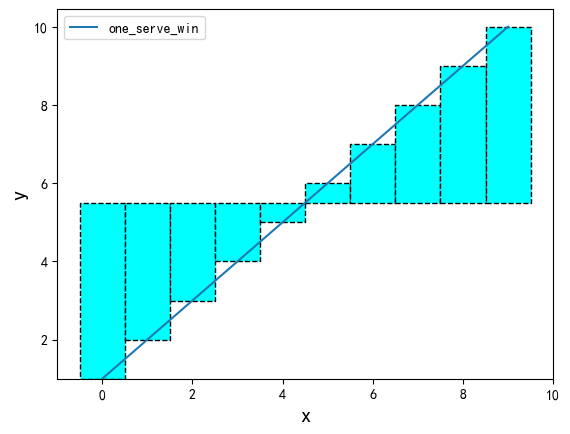

In [137]:
import matplotlib.pyplot as plt

x = np.arange(10)
y = np.arange(1, 11)
mean = 5.5

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x, y, label = 'one_serve_win')
for i in range(len(x)):
    bottom = mean if mean < y[i] else y[i]
    height = abs(mean - y[i])
    ax.bar(i, bottom = bottom, height = height, ls="--", align = "center", ec="black", fc="#00FFFF", alpha = 1, width = 1)
# ax.plot(x, y2, label = 'one_serve_back')
# ax.plot(x, y3, label = 'one_serve_success')
# ax.plot(x, y4, label = 'two_serve_win')
# ax.plot(x, y5, label = 'two_serve_back')
# ax.plot(x, y6, label = 'double_fault')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.legend()
plt.show()

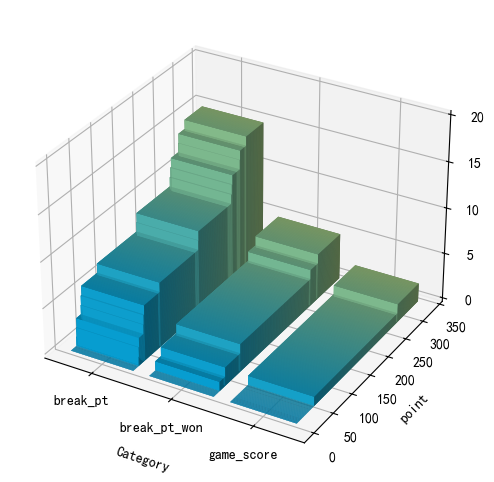

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap  
  
# 创建自定义的渐变颜色  

np.random.seed(0)
categories = ['break_pt', 'break_pt_won', 'game_score']
# categories = ['one_serve_win', 'one_serve_back', 'one_ser', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# size = (334, 3)
values = np.array([break_pt_2, break_pt_won_2, game_score_2]).T

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid(np.arange(3),np.arange(334))
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = np.zeros(len(x_data))

cmaps = LinearSegmentedColormap.from_list('my_cmap', ['#00b0f0', '#acd78e'])  

dx = dy = 0.8
# dx = (0.1, 0.9)
dz = values.flatten()
# colors = sns.color_palette('cool', len(z_data))
# colors = sns.color_palette('red')
ax.bar3d(x_data, y_data, z_data, dx, dy, dz, color=cmaps(np.arange(len(z_data)) / len(z_data)), shade=True)

ax.set_xticks([0.4, 1.4, 2.4])
ax.set_xticklabels(categories)
ax.set_zticks([i for i in range(0, 21, 5)])

# ax.set_title('p2 beark and game score')
ax.set_xlabel('Category', labelpad = 10, loc = 'left')
ax.set_ylabel('point')
ax.set_zlabel('Height')
plt.show()

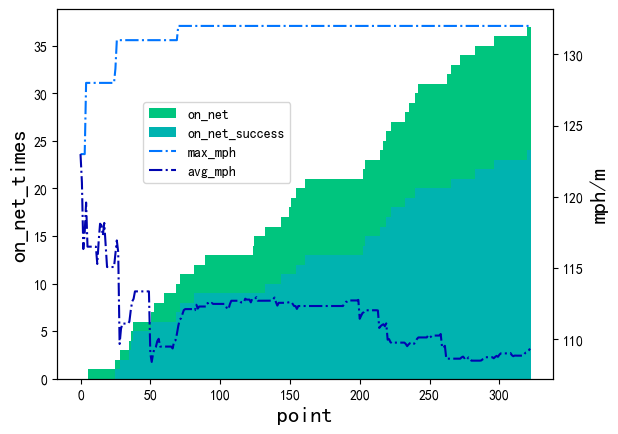

In [95]:
import numpy as np  
import matplotlib.pyplot as plt  

x = np.arange(323)
y1 = max_mph_1[10: -1]
y2 = avg_mph_1[10: -1]
y5 = on_net_1[10: -1]
y6 = on_net_success_1[10: -1]

fig, ax1 = plt.subplots()  
ax2 = ax1.twinx()  

ax1.bar(x, y5, label='on_net', color = '#00c57e', width = 1)
ax1.bar(x, y6, label='on_net_success', color = '#00b3b0', width = 1)
# ax1.plot(x, y5, label='y2轴', ls='--', color = '#F9F871')
# ax1.plot(x, y6, label='y2轴', ls='--', color = '#FFB63E')
ax2.plot(x, y1, label='max_mph', ls='-.', color = '#0075FF')
ax2.plot(x, y2, label='avg_mph', ls='-.', color = '#0004B0')

ax1.set_xlabel('point', fontdict={'size': 16})
ax1.set_ylabel('on_net_times',fontdict={'size': 16})
ax2.set_ylabel('mph/m',fontdict={'size': 16})

# plt.title('on net and mph')  

fig.legend(loc=1, bbox_to_anchor=(0.5, 0.7))

plt.show()


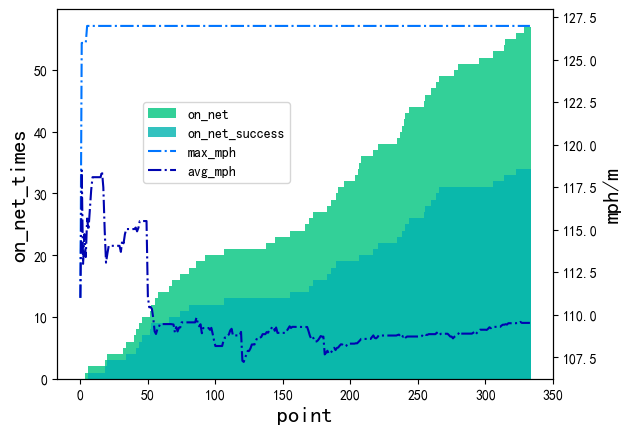

In [94]:
import numpy as np  
import matplotlib.pyplot as plt  

x = np.arange(334)
y1 = max_mph_2
y2 = avg_mph_2
y5 = on_net_2
y6 = on_net_success_2

fig, ax1 = plt.subplots()  
ax2 = ax1.twinx()  

ax1.bar(x, y5, label='on_net', color = '#00c57e', width = 1, alpha = 0.8)
ax1.bar(x, y6, label='on_net_success', color = '#00b3b0', width = 1, alpha = 0.8)
# ax1.plot(x, y5, label='y2轴', ls='--', color = '#F9F871')
# ax1.plot(x, y6, label='y2轴', ls='--', color = '#FFB63E')
ax2.plot(x, y1, label='max_mph', ls='-.', color = '#0075FF')
ax2.plot(x, y2, label='avg_mph', ls='-.', color = '#0004B0')

ax1.set_xlabel('point', fontdict={'size': 16})
ax1.set_ylabel('on_net_times',fontdict={'size': 16})
ax2.set_ylabel('mph/m',fontdict={'size': 16})

# plt.title('on net and mph')  

fig.legend(loc=1, bbox_to_anchor=(0.5, 0.7))

plt.show()


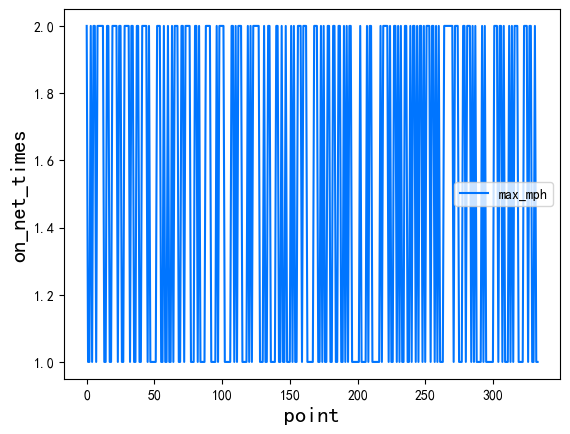

In [108]:
import numpy as np  
import matplotlib.pyplot as plt  

y = final_match[:, category['point_victor']]

x = np.arange(334)

fig, ax = plt.subplots()  
# ax2 = ax1.twinx()  

# ax1.bar(x, y5, label='on_net', color = '#00c57e', width = 1)
# ax1.bar(x, y6, label='on_net_success', color = '#00b3b0', width = 1)
# ax1.plot(x, y5, label='y2轴', ls='--', color = '#F9F871')
# ax1.plot(x, y6, label='y2轴', ls='--', color = '#FFB63E')
ax.plot(x, y, label='max_mph', color = '#0075FF')
# ax2.plot(x, y2, label='avg_mph', ls='-.', color = '#0004B0')

ax.set_xlabel('point', fontdict={'size': 16})
ax.set_ylabel('on_net_times',fontdict={'size': 16})
# ax2.set_ylabel('mph/m',fontdict={'size': 16})

# plt.title('on net and mph')  

# fig.legend(loc=1, bbox_to_anchor=(0.5, 0.7))
ax.legend()

plt.show()


In [32]:
# 打印出上面数组所有的长度
print('on_serve_1',len(one_serve_win_1))
print('on_serve_2',len(one_serve_win_2))
print('one_serve_back_1',len(one_serve_back_1))
print('one_serve_back_2',len(one_serve_back_2))
print('one_serve_success_1',len(one_serve_success_1))
print('one_serve_success_2',len(one_serve_success_2))
print('two_serve_win_1',len(two_serve_win_1))
print('two_serve_win_2',len(two_serve_win_2))
print('two_serve_back_1',len(two_serve_back_1))
print('two_serve_back_2',len(two_serve_back_2))
print('break_pt_1',len(break_pt_1))
print('break_pt_2',len(break_pt_2))
print('break_pt_won_1',len(break_pt_won_1))
print('break_pt_won_2',len(break_pt_won_2))
print('continuous_win_1',len(continuous_win_1))
print('continuous_win_2',len(continuous_win_2))
print('avg_mph_1',len(avg_mph_1))
print('avg_mph_2',len(avg_mph_2))
print('max_mph_1',len(max_mph_1))
print('max_mph_2',len(max_mph_2))

print('double_fault_1',len(double_fault_1))
print('double_fault_2',len(double_fault_2))
print('unf_err_1',len(unf_err_1))
print('unf_err_2',len(unf_err_2))
print('get_ace_1',len(get_ace_1))
print('get_ace_2',len(get_ace_2))
print('return_duce_1',len(return_duce_1))
print('return_duce_2',len(return_duce_2))
print('get_ad_1',len(get_ad_1))
print('get_ad_2',len(get_ad_2))
print('run_distance_1',len(run_distance_1))
print('run_distance_2',len(run_distance_2))
print('hit_num_1',len(hit_num_1))
print('hit_num_2',len(hit_num_2))
print('on_net_1',len(on_net_1))
print('on_net_2',len(on_net_2))
print('on_net_success_1',len(on_net_success_1))
print('on_net_success_2',len(on_net_success_2))




on_serve_1 334
on_serve_2 334
one_serve_back_1 334
one_serve_back_2 334
one_serve_success_1 334
one_serve_success_2 334
two_serve_win_1 334
two_serve_win_2 334
two_serve_back_1 334
two_serve_back_2 334
break_pt_1 334
break_pt_2 334
break_pt_won_1 334
break_pt_won_2 334
continuous_win_1 334
continuous_win_2 334
avg_mph_1 334
avg_mph_2 334
max_mph_1 334
max_mph_2 334
double_fault_1 334
double_fault_2 334
unf_err_1 334
unf_err_2 334
get_ace_1 334
get_ace_2 334
return_duce_1 334
return_duce_2 334
get_ad_1 334
get_ad_2 334
run_distance_1 334
run_distance_2 334
hit_num_1 334
hit_num_2 334
on_net_1 334
on_net_2 334
on_net_success_1 334
on_net_success_2 334


In [33]:
# 将上面的数组合并成一个大的矩阵，用于训练
train_data = np.array([one_serve_win_1, one_serve_win_2, one_serve_back_1, one_serve_back_2, one_serve_success_1, one_serve_success_2, two_serve_win_1, two_serve_win_2, two_serve_back_1, two_serve_back_2, break_pt_1, break_pt_2, break_pt_won_1, break_pt_won_2, continuous_win_1, continuous_win_2, avg_mph_1, avg_mph_2, max_mph_1, max_mph_2, double_fault_1, double_fault_2, unf_err_1, unf_err_2, get_ace_1, get_ace_2, return_duce_1, return_duce_2, get_ad_1, get_ad_2, run_distance_1, run_distance_2, hit_num_1, hit_num_2, on_net_1, on_net_2, on_net_success_1, on_net_success_2]).T
print(train_data.shape)

(334, 38)


In [34]:
train_label = final_match[:, category['point_victor']]
print(train_label.shape)
print(train_label)

(334,)
[2 1 1 2 1 2 2 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 2 1 1 2 2 2 2 1 2 2 1 1
 2 2 1 1 2 2 2 2 1 2 1 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 2 1 2 2 2 1 1 2 2 1 2
 2 2 2 1 1 1 2 2 1 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 2 2 1 2
 1 2 2 2 1 1 1 1 2 1 2 1 2 2 2 2 2 1 1 1 2 1 1 2 2 1 1 1 1 2 2 1 1 2 1 1 2
 1 1 1 2 1 2 1 1 2 2 2 1 2 2 2 1 1 1 1 1 2 2 2 1 1 2 1 2 1 1 2 2 1 1 2 2 1
 1 2 2 1 1 2 1 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 2
 2 1 2 1 1 2 2 1 2 1 2 1 1 2 2 1 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 2 1 2 2 1 2
 1 2 1 1 1 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 2 2 1 2 1 2 1 1 1 1 2 1 2 1
 1 1 1 1 1 2 2 2 1 2 2 1 2 1 1 1 2 1 2 1 2 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1
 1]


In [35]:
f = lambda s : 1 / (1 + np.exp(-s))
df = lambda s : f(s) * (1-f(s))

def bc(w, z, delta_next):
    f = lambda s : 1 / (1 + np.exp(-s))
    df = lambda s : f(s) * (1-f(s))
    delta = np.dot(w.T, delta_next) * df(z)
    return delta

def fc(w, a):
    f = lambda s : 1 / (1 + np.exp(-s))
    z_next = np.dot(w, a)
    a_next = f(z_next)
    return a_next, z_next

def cost(a, y):
    J = np.sum((a - y)**2)
    return J / 2

def softmax(z):
    return np.sum(z > 0.5, axis = 0)

def accuracy(a, y):
    acc = np.sum(np.argmax(a, axis = 0) == (y - 1))
    return acc



0 test acc: 0.5299401197604791


C:\Users\1\AppData\Local\Temp\ipykernel_23648\922813368.py:11: RuntimeWarning: overflow encountered in exp
  f = lambda s : 1 / (1 + np.exp(-s))
C:\Users\1\AppData\Local\Temp\ipykernel_23648\922813368.py:5: RuntimeWarning: overflow encountered in exp
  f = lambda s : 1 / (1 + np.exp(-s))


1 test acc: 0.5179640718562875
2 test acc: 0.5
3 test acc: 0.5119760479041916
4 test acc: 0.5119760479041916
5 test acc: 0.5029940119760479
6 test acc: 0.5119760479041916
7 test acc: 0.5059880239520959
8 test acc: 0.5119760479041916
9 test acc: 0.5089820359281437
10 test acc: 0.5149700598802395
11 test acc: 0.5089820359281437
12 test acc: 0.5029940119760479
13 test acc: 0.5029940119760479
14 test acc: 0.5059880239520959
15 test acc: 0.5089820359281437
16 test acc: 0.5119760479041916
17 test acc: 0.5149700598802395
18 test acc: 0.5029940119760479
19 test acc: 0.5119760479041916
20 test acc: 0.5239520958083832
21 test acc: 0.5299401197604791
22 test acc: 0.5449101796407185
23 test acc: 0.5239520958083832
24 test acc: 0.5029940119760479
25 test acc: 0.5029940119760479
26 test acc: 0.5029940119760479
27 test acc: 0.5029940119760479
28 test acc: 0.5029940119760479
29 test acc: 0.5029940119760479
30 test acc: 0.5029940119760479
31 test acc: 0.5029940119760479
32 test acc: 0.5029940119760479


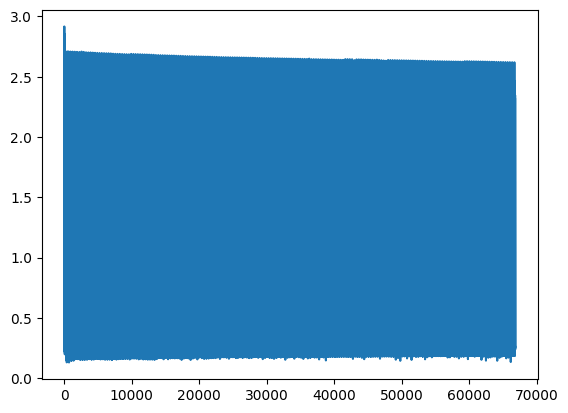

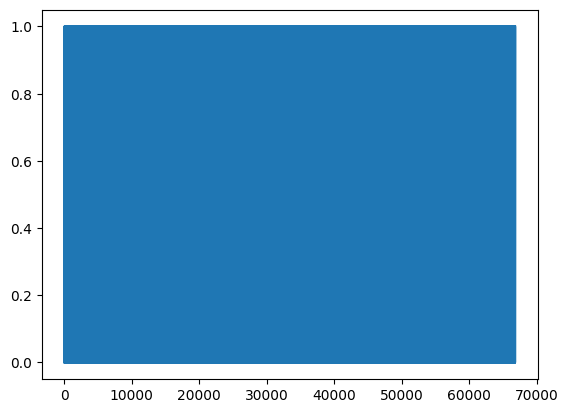

In [36]:
import math
import matplotlib.pyplot as plt

L = 4

train_size = len(train_label)

layer_size = [40, 200, 100, 2]

w = {}
for l in range(1, L):
    w[l] = np.random.randn(layer_size[l], layer_size[l-1]) * math.sqrt(6 / (layer_size[l] + layer_size[l-1]))
alpha = 0.01

J = []
Acc = []
max_epoch = 200
momentum = np.array([[0, 0]])

for epoch_num in range(max_epoch):
    momentum = np.array([[0, 0]])
    
    for k in range(train_size):
        a, z, delta = {}, {}, {}
        a[1] = np.hstack((train_data[k], momentum[0])).reshape(40, 1)
        y = train_label[k]
        
        for l in range(2, L + 1):
            a[l], z[l] = fc(w[l - 1], a[l - 1])
        
        momentum = a[L].T
        delta[L] = (a[L] - y + 1) * df(z[L])
        
        for l in range(L - 1, 1, -1):
            delta[l] = bc(w[l], z[l], delta[l + 1])
            
        for l in range(1, L):
            w[l] = w[l] - alpha * delta[l + 1] @ a[l].T

        J.append(cost(a[L], y))
        Acc.append(accuracy(a[L], y))

    acc = 0
    momentum = np.array([[0, 0]])
    for k in range(train_size):
        a, z, delta = {}, {}, {}
        a[1] = np.hstack((train_data[k], momentum[0])).reshape(40, 1)
        y = train_label[k]
        
        for l in range(2, L + 1):
            a[l], z[l] = fc(w[l - 1], a[l - 1])
        if np.argmax(a[L], axis = 0) == (y - 1):
            acc += 1
    # # end your code #
    # print(epoch_num, "training acc:", Acc[-1], 'test acc:', accuracy(a[L], y))
    print(epoch_num, 'test acc:', acc / train_size)

plt.figure()
plt.plot(J)
# plt.savefig("J_" + str(L) + ".png")
# plt.close()
plt.figure()
plt.plot(Acc)
# plt.savefig("Acc_" + str(L) + ".png")
# plt.close()


# model_name = 'model_' + str(L) + '.pkl'
# with open(model_name, 'wb') as f:
#     pickle.dump([w, layer_size], f)
# print("model saved to {}".format(model_name))

In [37]:
m = np.hstack((train_data[k], momentum[0]))

print(m.shape)


(40,)


In [38]:
print(a[L])

softmax(np.argmax(a[L], axis = 0))
np.argmax(a[L], axis = 0)

[[0.48130482]
 [0.47927413]]


array([0], dtype=int64)

In [39]:
print(y - 1)

0
